In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as wf
import jax.numpy as jnp

In [2]:
%cd "C://Users//TRETEC//Documents//MVA//S1//[IPGM] Introduction to probabilistic graphical models//Projet//independent_component_analysis"
from mva_independent_component_analysis.utils.preprocessing import centering_and_whitening
from mva_independent_component_analysis.fast_ica.fastica_numpy import fast_ica
from mva_independent_component_analysis.utils.mix_sources import mix_sources
%cd experiments/exp2_speech

c:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


C:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis
C:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\experiments\exp2_speech


c:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# Importing speech signals and mixing them

In [3]:
s5_file='input/child-talking-theres-a-daddy.wav'
s4_file='input/talk-to-the-cashier-in-a-hardware-store.wav'
s3_file='input/mathias-words-request.wav'

In [4]:
sampling_rate_3, s3 = wf.read(s3_file)
print(s3.shape)
s3 = s3[:,0]

sampling_rate_4, s4 = wf.read(s4_file)
print(s4.shape)
s4 = s4[:,0]

sampling_rate_5, s5 = wf.read(s5_file)
print(s5.shape)

(682489, 2)
(1910016, 2)
(843972,)


C:\Users\TRETEC\AppData\Local\Temp\ipykernel_23832\3925245323.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate_3, s3 = wf.read(s3_file)


In [5]:
S=[s3,s4,s5]
S, X, Xw = mix_sources(S, False)
wf.write('./talks_mixture.wav', sampling_rate_5, X.mean(axis=0).astype(np.float32))

# ICA

In [6]:
W, mcc = fast_ica(Xw, 1, 1e-8, 5000, true_sources=S) #Nour's method.

component 0
iteration : 0 : distance 0.10816091299057007
----- MCC = 0.33623723483954865
iteration : 1 : distance 0.005920767784118652
----- MCC = 0.6270339138184985
iteration : 2 : distance 2.5033950805664062e-06
----- MCC = 0.6680548237636685
iteration : 3 : distance 0.0
----- MCC = 0.6680547442908088
component 1
iteration : 0 : distance 0.4522327780723572
----- MCC = 0.6680511084074775
iteration : 1 : distance 0.08601987361907959
----- MCC = 0.6676756984864672
iteration : 2 : distance 0.0033641457557678223
----- MCC = 0.41358060110360384
iteration : 3 : distance 4.76837158203125e-07
----- MCC = 0.6673339151311666
iteration : 4 : distance 0.0
----- MCC = 0.6673336375970393
component 2
iteration : 0 : distance 0.5269280672073364
----- MCC = 0.6673366376974931
iteration : 1 : distance 0.0
----- MCC = 0.6673366376974931


In [7]:
W, mcc = fast_ica(Xw, 1, 1e-8, 5000, true_sources=S) #Nour's method.

component 0


iteration : 0 : distance 0.13215434551239014
----- MCC = 0.34080769478653866
iteration : 1 : distance 0.009863853454589844
----- MCC = 0.5753715129879614
iteration : 2 : distance 1.138448715209961e-05
----- MCC = 0.6679953229613602
iteration : 3 : distance 0.0
----- MCC = 0.667995382566005
component 1
iteration : 0 : distance 0.46727365255355835
----- MCC = 0.6459813606925309
iteration : 1 : distance 2.855062484741211e-05
----- MCC = 0.6673219861307492
iteration : 2 : distance 1.1920928955078125e-07
----- MCC = 0.667324592359364
iteration : 3 : distance 1.1920928955078125e-07
----- MCC = 0.6673245899534473
component 2
iteration : 0 : distance 0.7824085652828217
----- MCC = 0.667337166533495
iteration : 1 : distance 0.0
----- MCC = 0.667337166533495


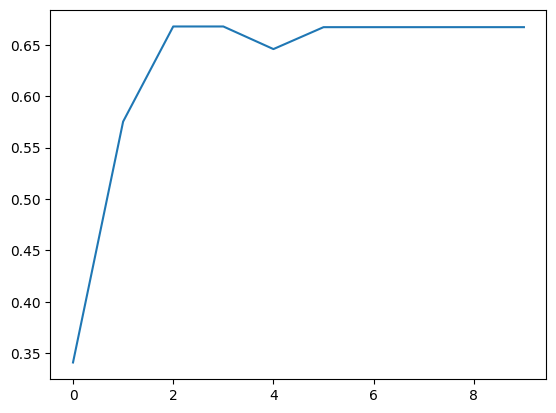

In [8]:
plt.plot(mcc)

In [9]:
unMixed = np.dot(W,Xw)


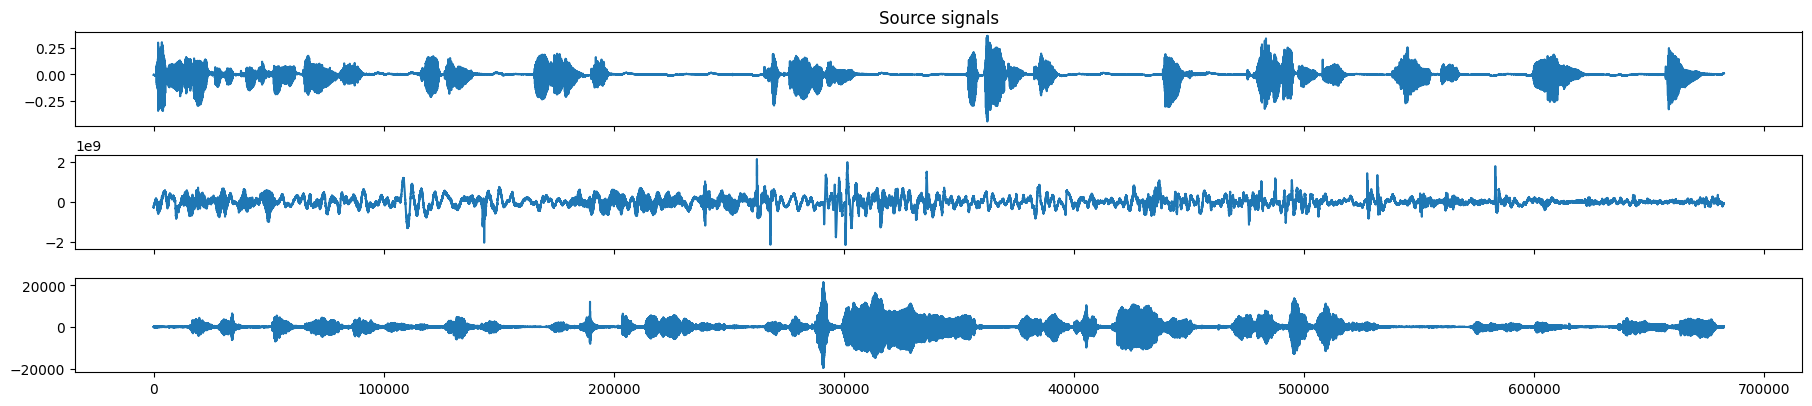

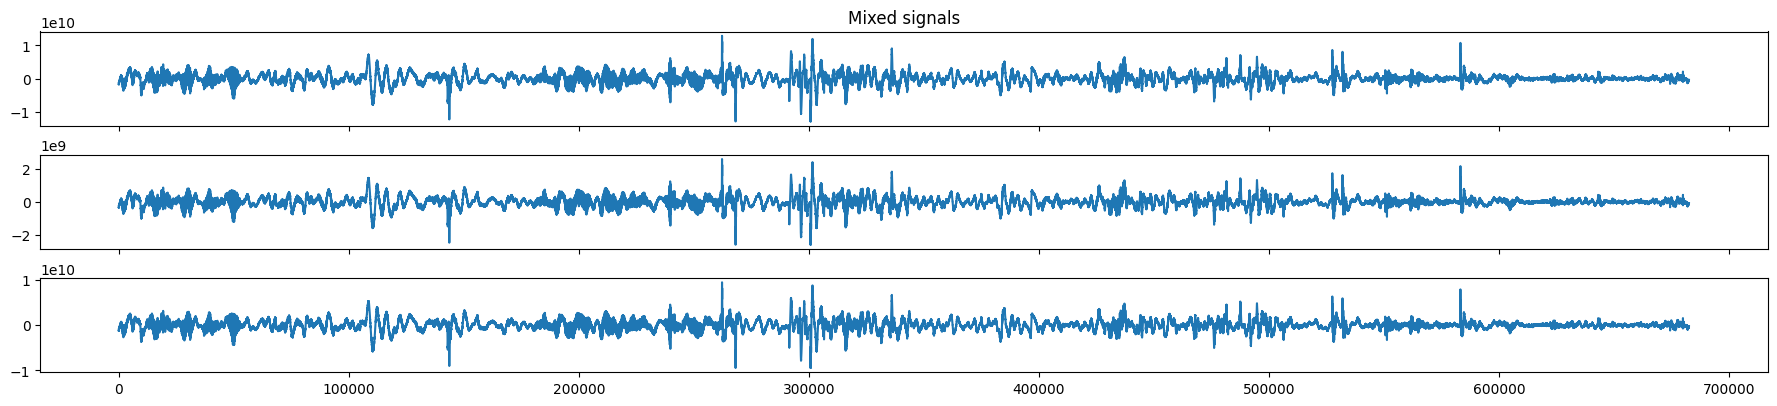

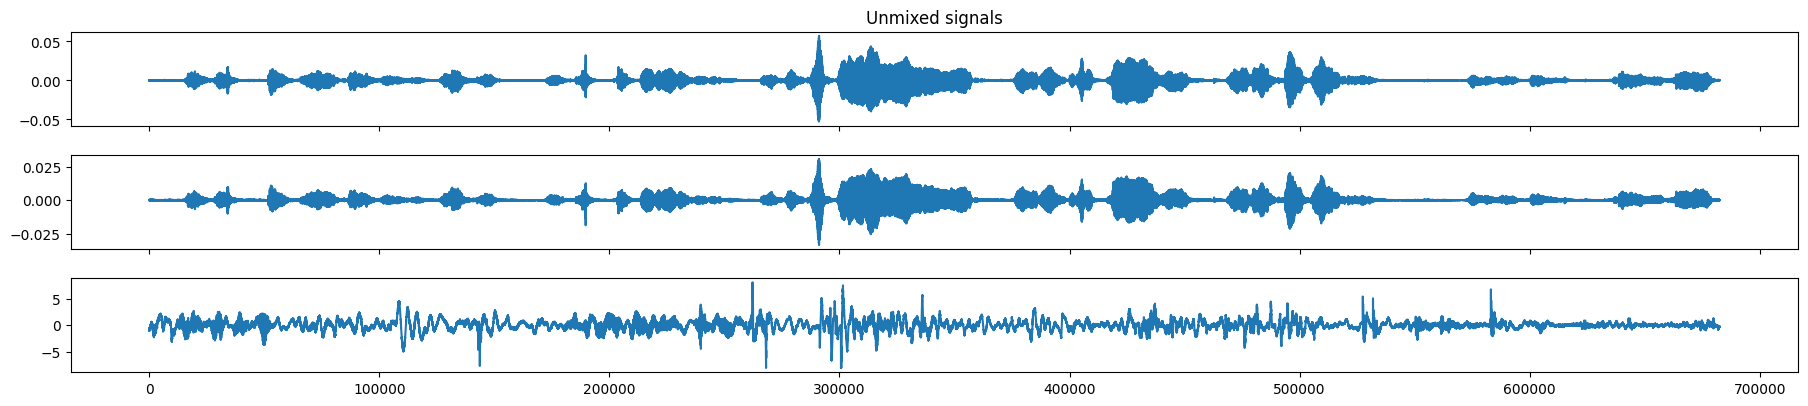

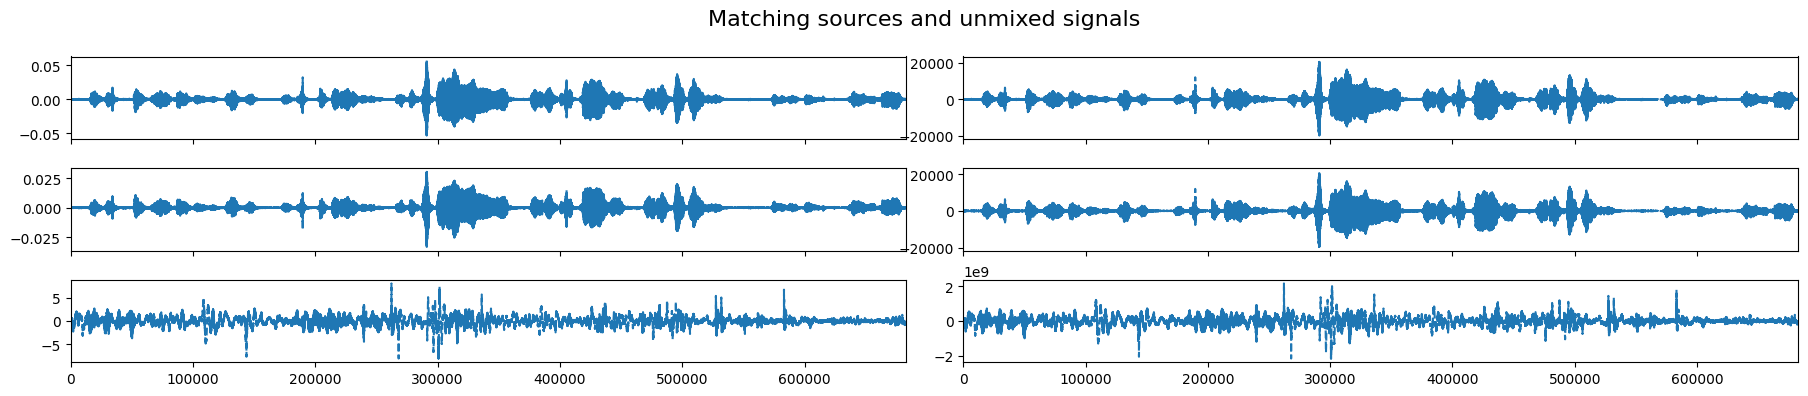

In [10]:
n_signals = X.shape[0]
# Plot input signals (not mixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Source signals')
for i in range(n_signals):
    axes[i].plot(S[i])

# Plot mixed signals 
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Mixed signals')
for i in range(n_signals):
    axes[i].plot(X[i])


# Plot recovered signals (unmixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Unmixed signals')
for i in range(n_signals):
    axes[i].plot(unMixed[i])

Sw, _, _ = centering_and_whitening(S)


fig, axes = plt.subplots(nrows=n_signals, ncols=2, figsize=(18, 4),sharex=True)
fig.suptitle('Matching sources and unmixed signals', fontsize=16)
fig.tight_layout()
for i in range(n_signals):
    perm = np.argmax(np.abs(unMixed[i,:] @ Sw.T))
    axes[i,0].plot(unMixed[i,:].T,'--')
    axes[i,1].plot(S[perm].T,'--')
    plt.xlim(0, S.shape[1])


# Scaling sources before applying ICA

The signal that has very low amplitude is not recovered. We try again but this time we ensure the scaling is the same for all sources the sources beforehand : 

In [11]:
S, X, Xw = mix_sources(S)
W,mcc = fast_ica(Xw, 1, 1e-8, 5000,true_sources=S) #Nour's method.
unMixed = np.dot(W,Xw)


component 0
iteration : 0 : distance 0.053928375244140625
----- MCC = 0.7827077110608419
iteration : 1 : distance 0.005212962627410889
----- MCC = 0.7845238645871481
iteration : 2 : distance 3.874301910400391e-06
----- MCC = 0.7845205664634705
iteration : 3 : distance 1.1920928955078125e-07
----- MCC = 0.7845207850138346
iteration : 4 : distance 1.1920928955078125e-07
----- MCC = 0.784520705540975
component 1
iteration : 0 : distance 0.15647077560424805
----- MCC = 0.8369068503379822
iteration : 1 : distance 0.000371396541595459
----- MCC = 0.8370405435562134
iteration : 2 : distance 0.00012040138244628906
----- MCC = 0.8370059132575989
iteration : 3 : distance 3.838539123535156e-05
----- MCC = 0.8369508584340414
iteration : 4 : distance 1.233816146850586e-05
----- MCC = 0.8369081020355225
iteration : 5 : distance 3.993511199951172e-06
----- MCC = 0.8368799289067587
iteration : 6 : distance 1.3113021850585938e-06
----- MCC = 0.8368625640869141
iteration : 7 : distance 4.172325134277344

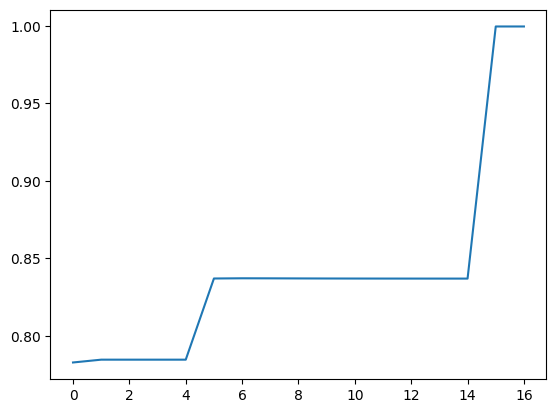

In [12]:
plt.plot(mcc)

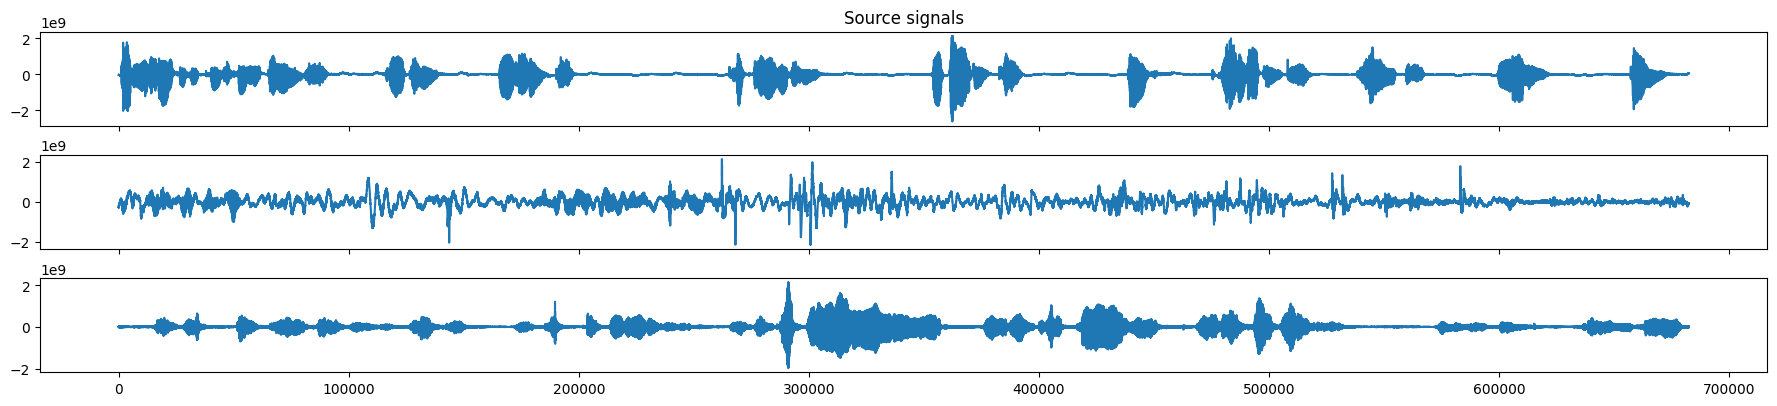

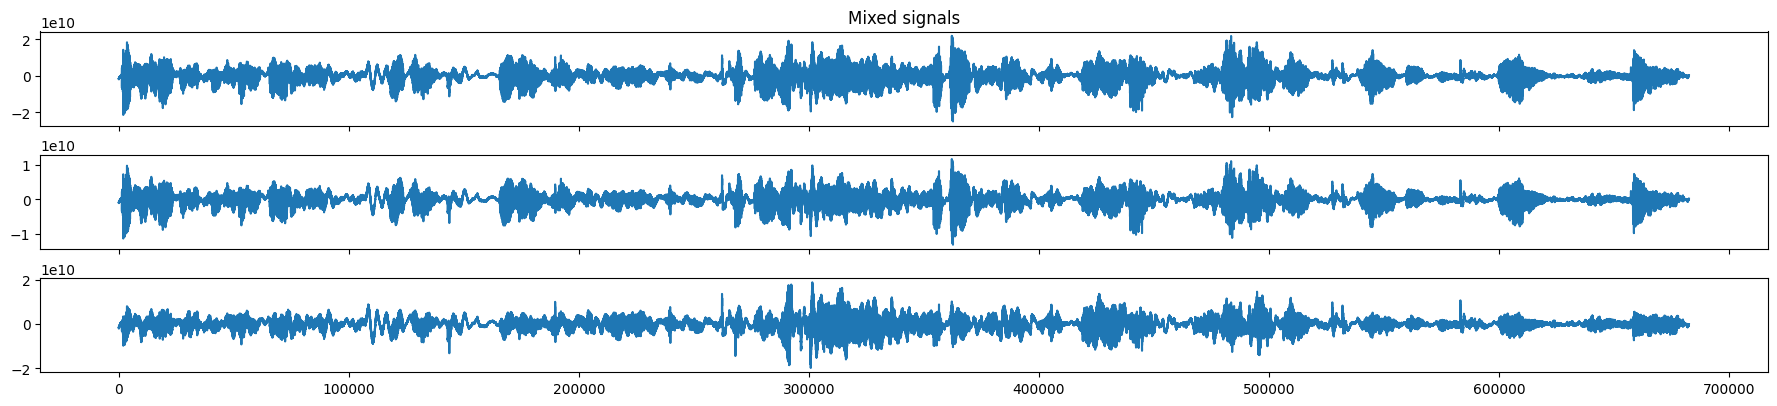

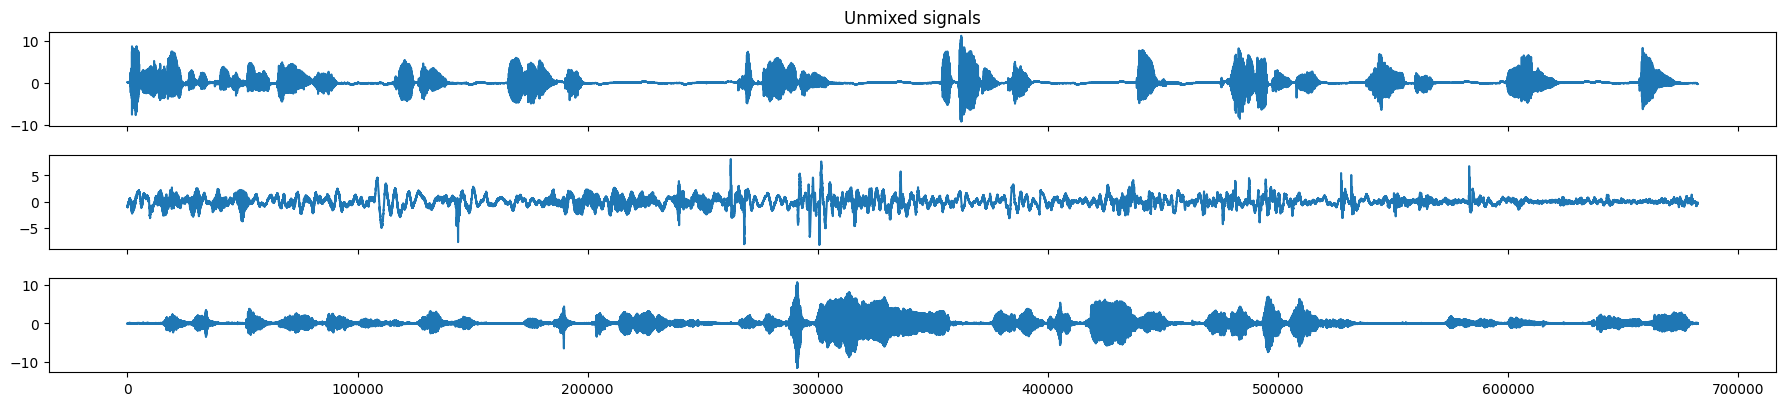

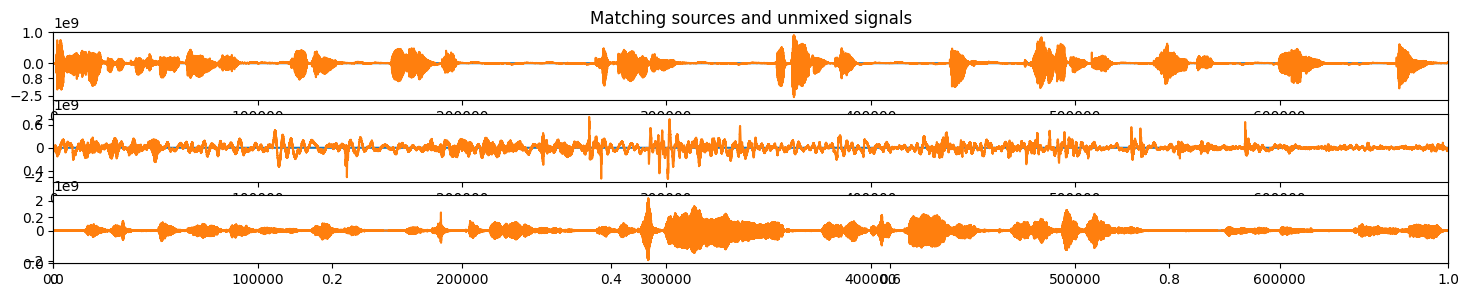

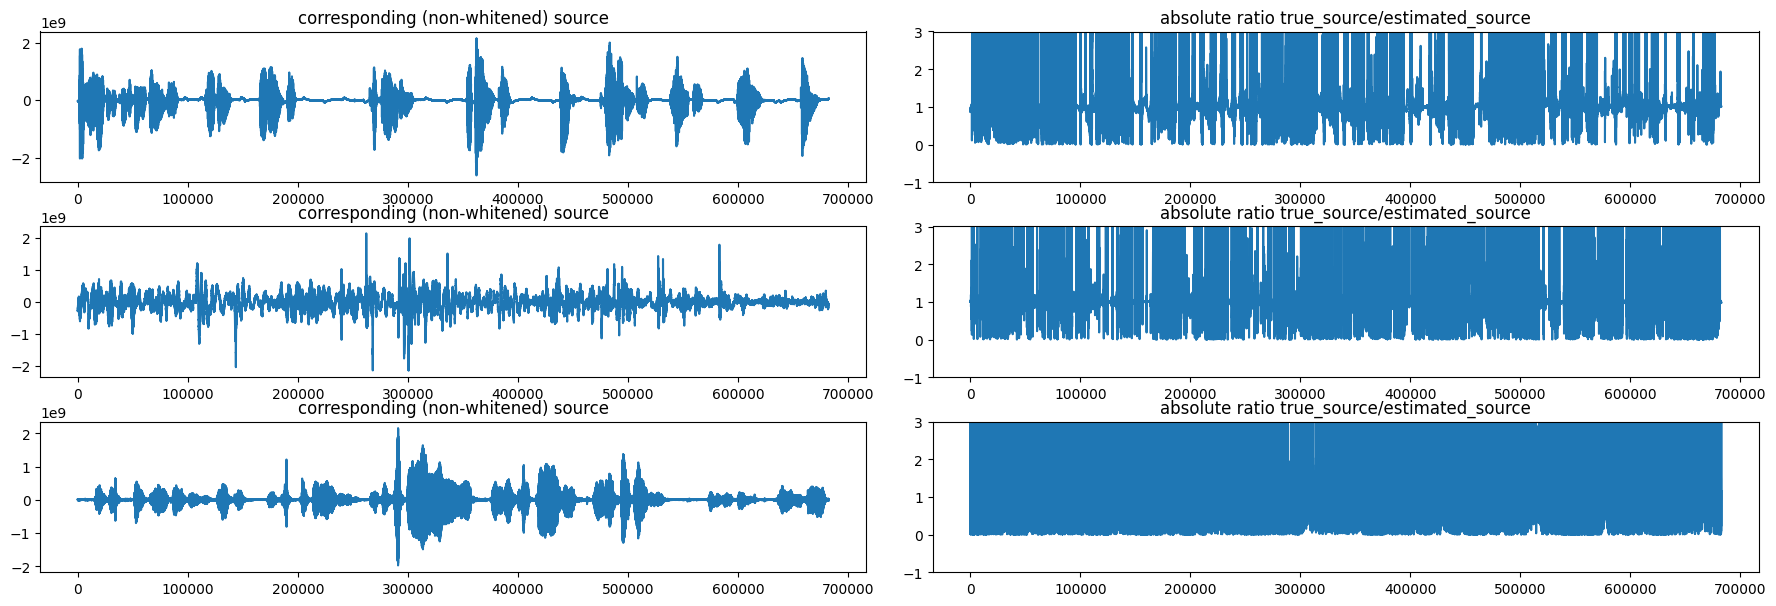

In [13]:
n_signals = X.shape[0]
# Plot input signals (not mixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Source signals')
for i in range(n_signals):
    axes[i].plot(S[i])

# Plot mixed signals 
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Mixed signals')
for i in range(n_signals):
    axes[i].plot(X[i])


# Plot recovered signals (unmixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Unmixed signals')
for i in range(n_signals):
    axes[i].plot(unMixed[i])

Sw, _, _ = centering_and_whitening(S)

plt.figure(figsize=(18,3))
plt.title("Matching sources and unmixed signals")
for i in range(X.shape[0]):
    perm = np.argmax(np.abs(unMixed[i,:] @ Sw.T))
    plt.subplot(n_signals,1,i+1)
    plt.plot(unMixed[i,:].T)
    plt.plot(S[perm].T)
    plt.xlim(0, S.shape[1])
    # ax.set_ylim(-1.5, 1.5)


perm = jnp.argmax(jnp.abs(unMixed @ S.T),
                    axis=0)
fig, axes = plt.subplots(3, 2, figsize=[18, 6])
fig.tight_layout()
for i in range(n_signals):
    axes[i,0].plot(S[perm[i]])
    axes[i,0].set_title('corresponding (non-whitened) source')
    axes[i,1].plot(np.abs(unMixed[i] / Sw[perm[i]]), '-')
    axes[i,1].set_title('absolute ratio true_source/estimated_source')
    axes[i,1].set_ylim(-1,3)
plt.show()

In [14]:
wf.write('output/s3_predicted.wav', sampling_rate_5, unMixed[0].astype(np.float32))
wf.write('output/s4_predicted.wav', sampling_rate_5, unMixed[1].astype(np.float32))
wf.write('output/s5_predicted.wav', sampling_rate_5, unMixed[2].astype(np.float32))

In [19]:
%cd independent_component_analysis

C:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis


c:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [20]:
# LaTeX code for the subplot
subplot_code_ = r'''
\nextgroupplot[
        title=Evolution of MCC during FastICA algorithm iterations on real speech data,
        xlabel={iterations},
        ylabel={MCC Score},
        xmin=0, xmax=%d,
        ymin=%f, ymax=%f
        ]
\addplot[
    color=blue,
] coordinates {
    %s
};
''' % (len(mcc)-1, min(mcc)-0.1, 1, ' '.join(f'({i},{score:.2f})' for i, score in enumerate(mcc)))

# Save the LaTeX code to a file
file_path = 'report/figures_latex/mcc_speech_fastica.tex'  # Path to save the .tex file
with open(file_path, 'w') as file:
    file.write(subplot_code_.strip())


In [22]:
n_sources=S.shape[0]

In [23]:
# Generate LaTeX code for the figure
latex_figure_code = r"""
\begin{figure}[H]
\centering
\begin{tikzpicture}
\begin{axis}[
    title={Ratio signals},
    xlabel={Sample number},
    ylabel={},
    xmin=0, xmax=1000,
    ymin=-1.5, ymax=1.5,
    legend pos=north east,
    xmajorgrids=true,
    ymajorgrids=true,
    grid style=dashed,
    width=\textwidth,
    height=8cm,
    label style={font=\large},
    title style={font=\Large},
]
"""

# Loop over each source to add plots to the LaTeX code
for i in range(n_sources):
    # Simulate the ratio signal
    ratio_signal = np.abs(unMixed[perm[i]] / Sw[i])
    # Create a data file for each source
    data_filename = f'report/data/ratio_toy_sources_{i+1}.dat'
    with open(data_filename, 'w') as f:
        for j in range(S.shape[1]):
            f.write(f"{j} {ratio_signal[j]:.2f}\n")
    
    # Add plot to the LaTeX code for each source
    latex_figure_code += rf"""\addplot[color=blue, no marks] table {{data/ratio_toy_sources_{i+1}.dat}};
    \addlegendentry{{Recovered signals {i+1}}}
"""

# Close the axis and tikzpicture environments
latex_figure_code += r"""
\end{axis}
\end{tikzpicture}
\caption{Plot of ratio signals for each source.}
\end{figure}
"""

# Save the LaTeX code to a .tex file
latex_file_path = 'report/figures_latex/ratio_toy_sources.tex'
with open(latex_file_path, 'w') as file:
    file.write(latex_figure_code)

